In [1]:
import nltk
import random


In [2]:
from nltk.corpus import names

In [3]:
names.fileids()

[u'female.txt', u'male.txt']

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline


In [5]:
name_cfd = nltk.ConditionalFreqDist((fileid, name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

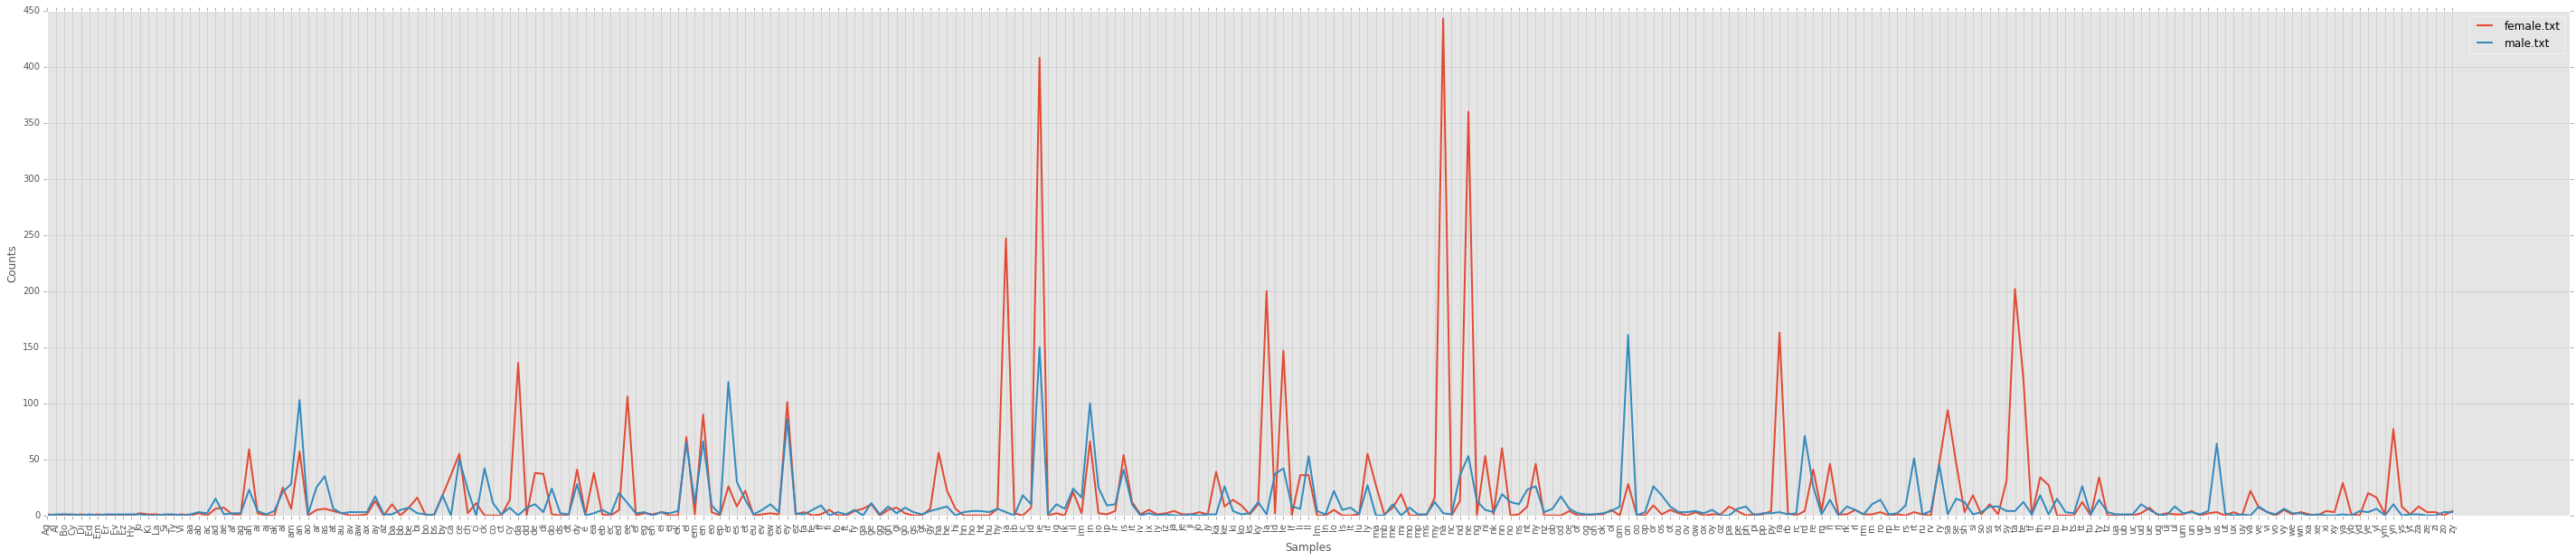

In [6]:
plt.figure(figsize=(50,10))
name_cfd.plot()

In [7]:
def name_feature(name):
    return {"pair": name[-2:]}


In [9]:
name_feature("Katy")

{'pair': 'ty'}

In [10]:
name_list = [(name, "male") for name in names.words('male.txt')] + [(name, "female") for name in names.words('female.txt')]

In [11]:
name_list[:10]

[(u'Aamir', 'male'),
 (u'Aaron', 'male'),
 (u'Abbey', 'male'),
 (u'Abbie', 'male'),
 (u'Abbot', 'male'),
 (u'Abbott', 'male'),
 (u'Abby', 'male'),
 (u'Abdel', 'male'),
 (u'Abdul', 'male'),
 (u'Abdulkarim', 'male')]

In [12]:
name_list[-10:]

[(u'Zonnya', 'female'),
 (u'Zora', 'female'),
 (u'Zorah', 'female'),
 (u'Zorana', 'female'),
 (u'Zorina', 'female'),
 (u'Zorine', 'female'),
 (u'Zsa Zsa', 'female'),
 (u'Zsazsa', 'female'),
 (u'Zulema', 'female'),
 (u'Zuzana', 'female')]

In [13]:
random.shuffle(name_list)

In [14]:
name_list[:10]

[(u'Marlow', 'male'),
 (u'Franni', 'female'),
 (u'Vito', 'male'),
 (u'Calvin', 'male'),
 (u'Joana', 'female'),
 (u'Randee', 'female'),
 (u'Ninette', 'female'),
 (u'Kali', 'female'),
 (u'Gunter', 'male'),
 (u'Troy', 'male')]

In [16]:
features = [(name_feature(name), gender) for (name, gender) in name_list]

In [17]:
features[:10]

[({'pair': u'ow'}, 'male'),
 ({'pair': u'ni'}, 'female'),
 ({'pair': u'to'}, 'male'),
 ({'pair': u'in'}, 'male'),
 ({'pair': u'na'}, 'female'),
 ({'pair': u'ee'}, 'female'),
 ({'pair': u'te'}, 'female'),
 ({'pair': u'li'}, 'female'),
 ({'pair': u'er'}, 'male'),
 ({'pair': u'oy'}, 'male')]

In [18]:
len(features)

7944

In [19]:
7944/2

3972

In [20]:
training_set = features[:3972]

In [21]:
testing_set = features[3972:]

In [22]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [23]:
male_names = names.words('male.txt')

In [24]:
"Carmello" in male_names

False

In [26]:
classifier.classify(name_feature("Carmello"))

'male'

In [27]:
nltk.classify.accuracy(classifier, testing_set)

0.7832326283987915